## 手动实现滤波操作
conv其实使用卷积核（滤波核）和原图做互相关运算输出到out的新图片

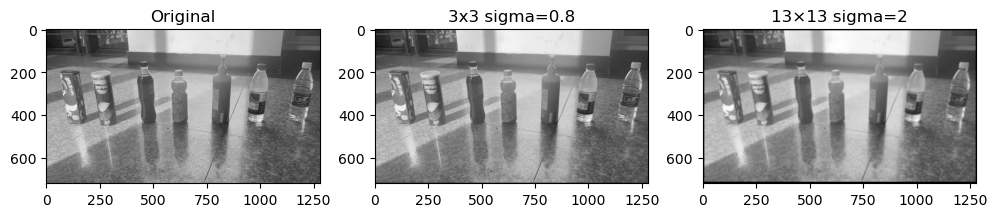

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('raw.jpg', 0)

def gaussian_kernel(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma * sigma))
    g = g / g.sum()
    return g

def conv(img, kernel):
    h, w = img.shape
    k = kernel.shape[0] // 2
    out = np.zeros_like(img, dtype=float)
    for i in range(k, h-k):
        for j in range(k, w-k):
            r = img[i-k:i+k+1, j-k:j+k+1]
            out[i,j] = np.sum(r * kernel)
    return out

kernel_small = gaussian_kernel(3, 0.8)
kernel_big = gaussian_kernel(13,2)

res_small = conv(img, kernel_small)
res_big = conv(img, kernel_big)

plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(img, cmap='gray'); plt.title('Original')
plt.subplot(132); plt.imshow(res_small, cmap='gray'); plt.title('3x3 sigma=0.8')
plt.subplot(133); plt.imshow(res_big, cmap='gray'); plt.title('13×13 sigma=2')
plt.show()


### 如下是彩色的情况，即三个通道？

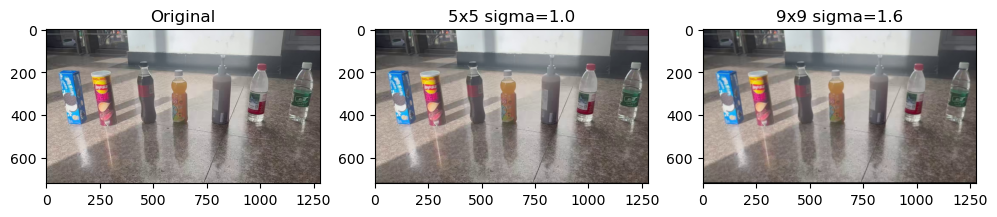

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('raw.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def gaussian_kernel(size, sigma):
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma * sigma))
    g = g / g.sum()
    return g

def conv_color(img, kernel):
    h, w, c = img.shape
    k = kernel.shape[0] // 2
    out = np.zeros_like(img, dtype=float)
    for ch in range(c):
        for i in range(k, h-k):
            for j in range(k, w-k):
                r = img[i-k:i+k+1, j-k:j+k+1, ch]
                out[i,j,ch] = np.sum(r * kernel)
    return out.astype(np.uint8)

kernel1 = gaussian_kernel(3, 0.8)
kernel2 = gaussian_kernel(7, 1.5)

res1 = conv_color(img, kernel1)
res2 = conv_color(img, kernel2)

plt.figure(figsize=(12,5))
plt.subplot(131); plt.imshow(img); plt.title('Original')
plt.subplot(132); plt.imshow(res1); plt.title('5x5 sigma=1.0')
plt.subplot(133); plt.imshow(res2); plt.title('9x9 sigma=1.6')
plt.show()
